<a href="https://colab.research.google.com/github/anand-bits/Classification-and-accuracy-by-using-diffrent-Classification-techniques/blob/main/Project_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading all the Libraries**

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [276]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [277]:
data=pd.read_csv('/content/sample_data/train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [278]:
data.shape

(891, 12)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [280]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [281]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Numerical Value Analysis**

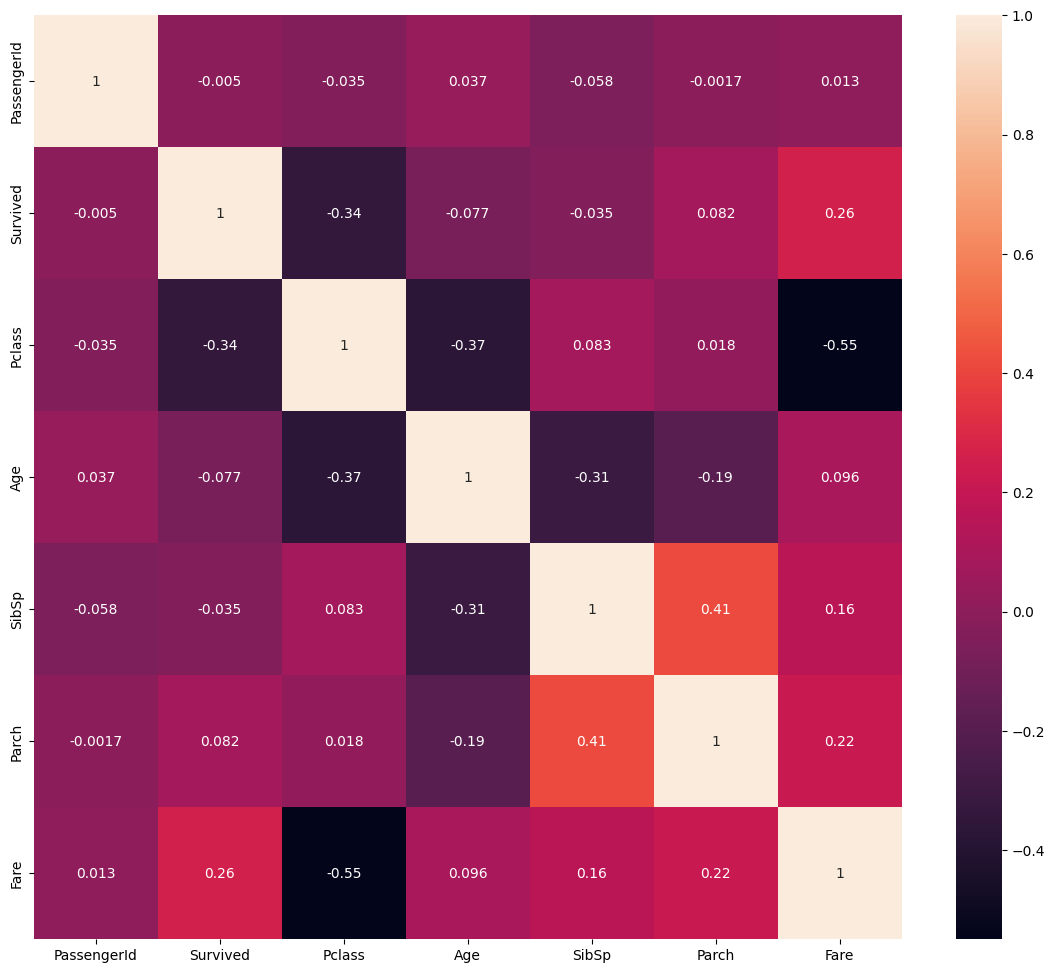

In [282]:
plt.figure(figsize=(14,12))
heatmap=sns.heatmap(data[['PassengerId',	'Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare']].corr(),annot=True)

# **sibsp-Number of sibilings/spouses aboard the Titanic**

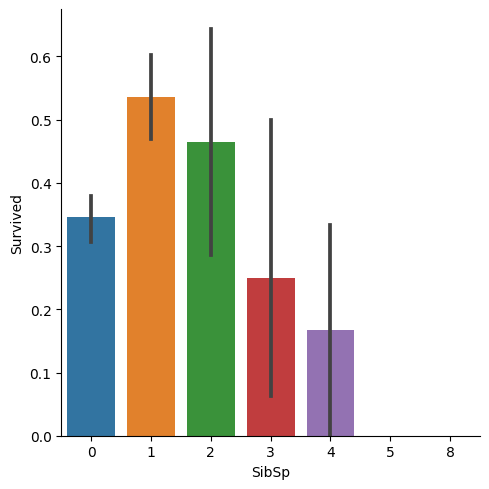

In [283]:
sns.catplot(x="SibSp",y="Survived",data=data,kind="bar")

# **Age Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


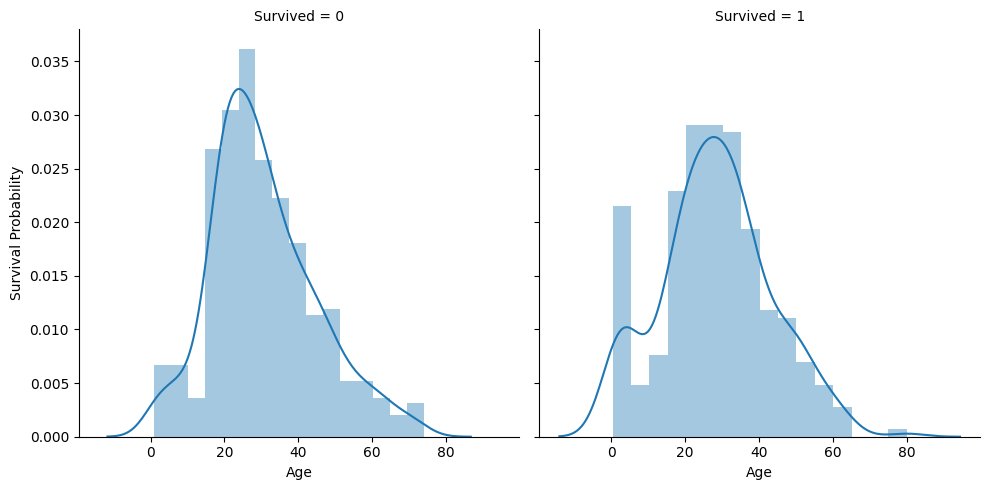

In [284]:
age_visual = sns.FacetGrid(data, col="Survived", height=5 )
age_visual = age_visual.map(sns.distplot, "Age").set_axis_labels("Age", "Survival Probability")



# **Gender analysis**

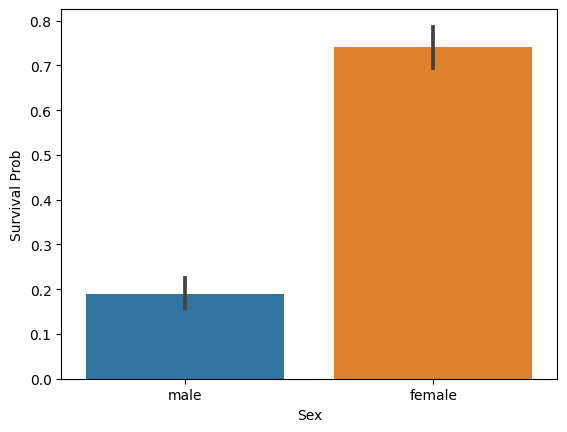

In [285]:
age_plot= sns.barplot(x="Sex",y="Survived",data=data).set_ylabel("Survival Prob")

In [286]:
data[["Sex",'Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


# **P Class**

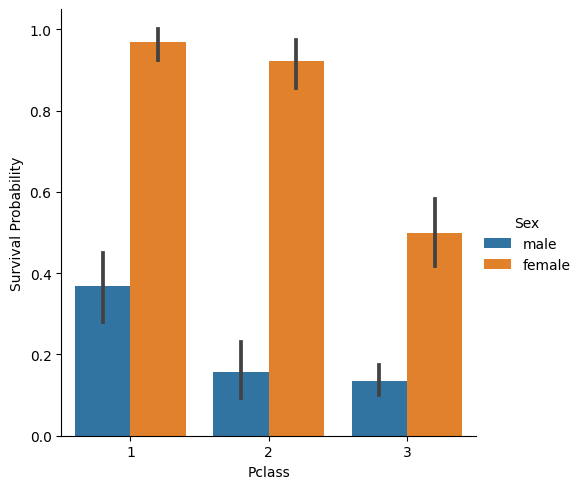

In [287]:
p_visual=sns.catplot(x="Pclass",y="Survived",data=data,kind="bar",height=5,hue="Sex")
p_visual=p_visual.set_ylabels("Survival Probability")

# **Data Prepration**

In [288]:
#dealing the null value ...
#for age data distribution is between the mean
mean=data['Age'].mean()
std= data['Age'].std()
is_null=data['Age'].isnull().sum()
print(mean,std,is_null)

29.69911764705882 14.526497332334042 177


In [289]:
random_age=np.random.randint(mean-std,mean+std,size=is_null)
type(random_age)

numpy.ndarray

In [290]:
a=data['Age'].copy()
a[np.isnan(a)]=random_age
a.isnull().sum()

0

In [291]:
data['Age']=a
data['Age'].isnull().sum()

0

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [293]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [294]:
data['Embarked']=data['Embarked'].fillna("S")
#most number are of these area
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Now dropping the Unwanted coloumn that are not important

In [295]:
col_to_drop=['PassengerId','Cabin','Ticket','Name']
data.drop(col_to_drop,axis=1,inplace=True)


In [296]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,38.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [297]:
gender={"male":0,"female":1}
data["Sex"]=data["Sex"].map(gender)

In [298]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
5,0,3,0,38.0,0,0,8.4583,Q
6,0,1,0,54.0,0,0,51.8625,S
7,0,3,0,2.0,3,1,21.0750,S
8,1,3,1,27.0,0,2,11.1333,S
9,1,2,1,14.0,1,0,30.0708,C


In [299]:
ports={"S":0,"C":1,"Q":2}
data['Embarked']=data["Embarked"].map(ports)

In [300]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,38.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


#**Splitting the data** 

In [301]:
x=data.drop(data.columns[[0]],axis=1)
y=data['Survived']

In [302]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [303]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_x.fit_transform(x_train)
sc_x.fit(x_test)

StandardScaler()

# **Classification**

In [304]:
logisticregression=LogisticRegression()
svc_classifier=SVC()
decision_treeclassifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier(5)
random_forest=RandomForestClassifier(n_estimators=900)

# **Training the model**

In [305]:
logisticregression.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
decision_treeclassifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
random_forest.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=900)

**Prediction Task Done here** 

In [306]:
log_predicts=logisticregression.predict(x_test)
svc_predicts=svc_classifier.predict(x_test)
dt_predicts=decision_treeclassifier.predict(x_test)
knn_predicts=knn_classifier.predict(x_test)
random_forest_predicts=random_forest.predict(x_test)


# **Accuracy of prediction** 

In [307]:
from sklearn.metrics import accuracy_score
log_regression_accuracy=accuracy_score(y_test,log_predicts)
svc_accuracy=accuracy_score(y_test,svc_predicts)
deccision_tree_accuracy=accuracy_score(y_test,dt_predicts)
knn_accuracy=accuracy_score(y_test,knn_predicts)
random_forest_accuracy=accuracy_score(y_test,random_forest_predicts)

In [308]:
print("Linear Regression accuracy:",round(log_regression_accuracy*100,2))
print("SVC  accuracy:",round(svc_accuracy*100,2))
print("Decision Tree accuracy:",round(deccision_tree_accuracy*100,2))
print("knn accuracy:",round(knn_accuracy*100,2))
print("random Forest accuracy:",round(random_forest_accuracy*100,2))

Linear Regression accuracy: 81.61
SVC  accuracy: 68.61
Decision Tree accuracy: 77.13
knn accuracy: 65.47
random Forest accuracy: 81.61


# **Testing From Kaggle Test set**

In [320]:
testing= pd.read_csv('/content/sample_data/test.csv')
testing.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [321]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [322]:
col_to_drop_testing=['PassengerId','Cabin','Ticket','Name']
testing.drop(col_to_drop,axis=1,inplace=True)
testing.head(10)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [324]:
mean2=testing['Age'].mean()
std2= testing['Age'].std()
is_null2=testing['Age'].isnull().sum()
print(mean2,std2,is_null2)

30.272590361445783 14.181209235624422 86


In [325]:
random_age2=np.random.randint(mean2-std2,mean2+std2,size=is_null2)

In [327]:
b=testing['Age'].copy()
b[np.isnan(b)]=random_age2
b.isnull().sum()

0